In [1]:
## import the pandas library
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
training_set = pd.read_csv("train.csv")
training_set.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [3]:
testing_set = pd.read_csv("test.csv")
testing_set.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

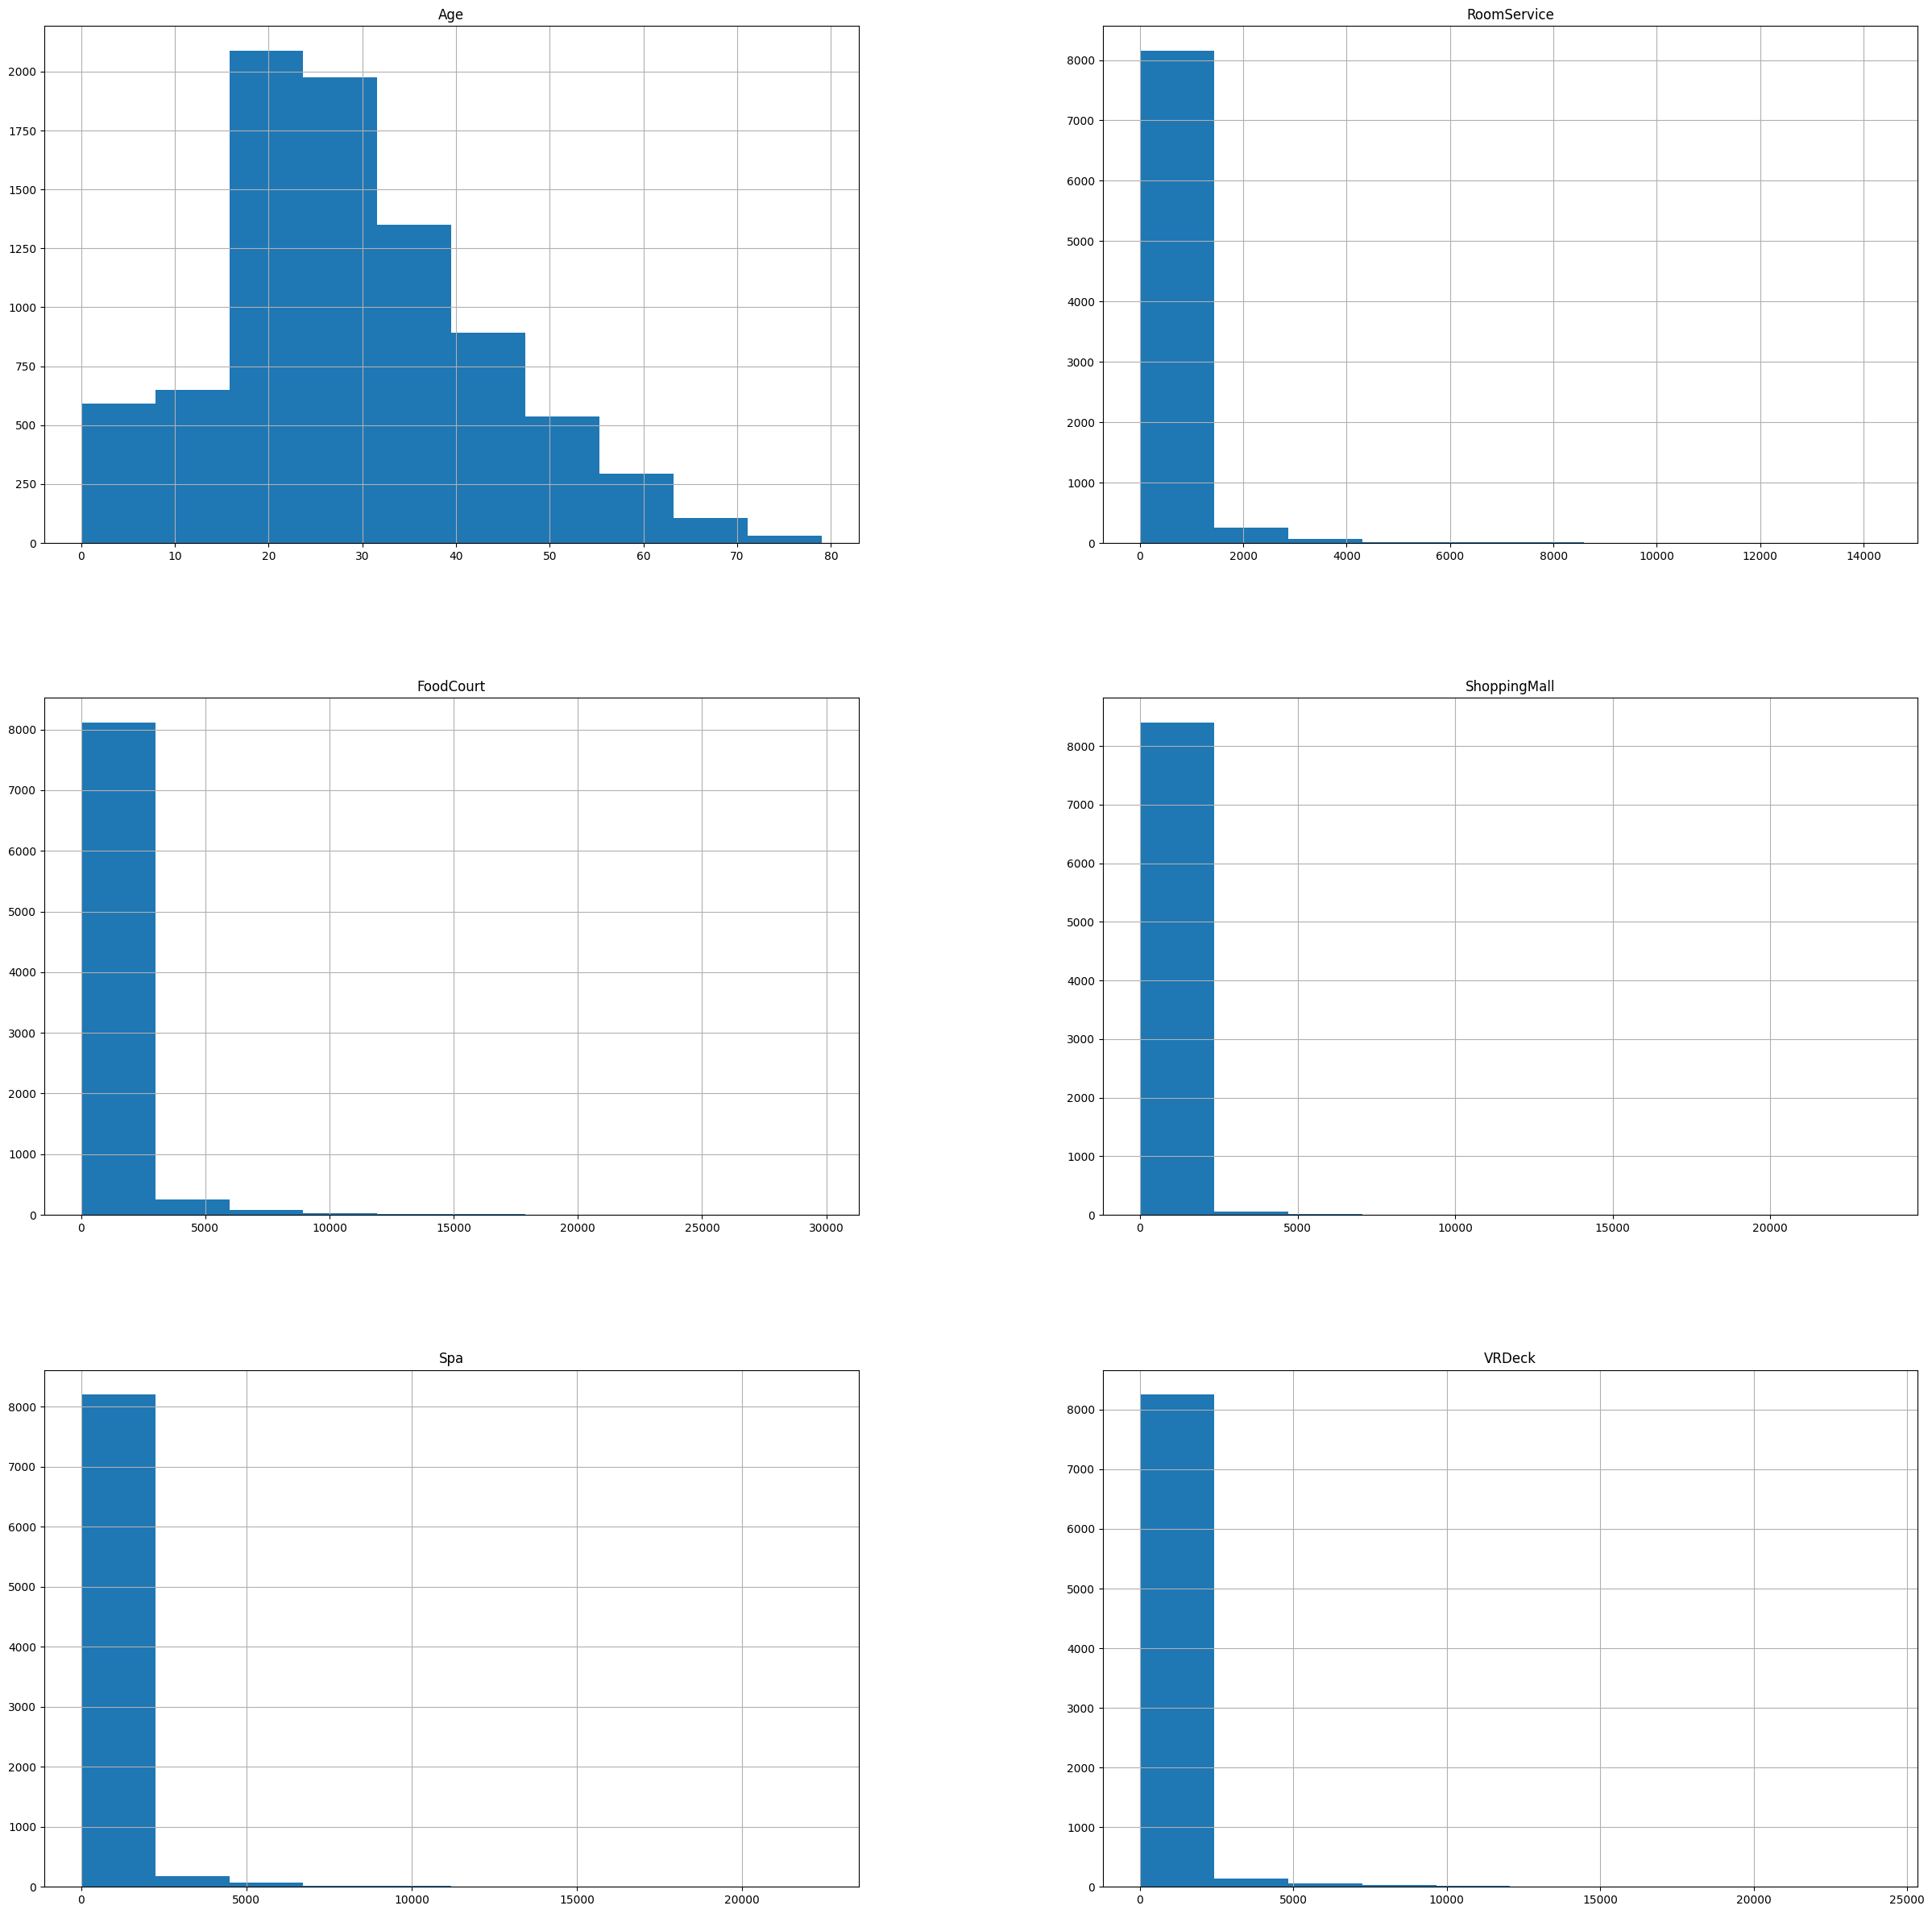

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [5]:
### summer statistics of the training set

In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## EDA (Explotary Data Analysis)

In [7]:
training_set

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [8]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'HomePlane' with the actual name of your column
# Replace np.nan with the actual representation of null values in your DataFrame
training_set.loc[training_set['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth'
training_set.loc[training_set['Destination'].isnull(), 'Destination']  ='TRAPPIST-1e'
training_set.loc[training_set['Age'].isnull(), 'Age']  = training_set['Age'].median()
training_set.loc[training_set['RoomService'].isnull(), 'RoomService'] = training_set['RoomService'].median()
training_set.loc[training_set['FoodCourt'].isnull(), 'FoodCourt'] = training_set['FoodCourt'].median()
training_set.loc[training_set['ShoppingMall'].isnull(), 'ShoppingMall'] = training_set['ShoppingMall'].median()
training_set.loc[training_set['Spa'].isnull(), 'Spa'] = training_set['Spa'].median()
training_set.loc[training_set['VRDeck'].isnull(), 'VRDeck'] = training_set['VRDeck'].median()
training_set.drop('Name', axis=1, inplace=True)
training_set.drop('Cabin',axis=1, inplace=True)

In [9]:
#training_set['HomePlanet'].fillna(training_set['HomePlanet'].mean(), inplace=True)

In [10]:
training_set['CryoSleep'].fillna(False, inplace=True)
training_set['VIP'].fillna(False, inplace=True)

In [11]:
# Replacement dictionary
replace_dict = {'CryoSleep': {False: 0, True: 1},
                'VIP': {False: 0, True: 1}}

# Perform replacement
training_set.replace(replace_dict, inplace=True)

In [12]:
training_set.head()

PassengerId HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
0     0001_01     Europa          0  TRAPPIST-1e  39.0    0          0.0   
1     0002_01      Earth          0  TRAPPIST-1e  24.0    0        109.0   
2     0003_01     Europa          0  TRAPPIST-1e  58.0    1         43.0   
3     0003_02     Europa          0  TRAPPIST-1e  33.0    0          0.0   
4     0004_01      Earth          0  TRAPPIST-1e  16.0    0        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True

In [13]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 755.7+ KB


In [14]:
import pandas as pd

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming 'training_set' is your DataFrame containing your training dataset
print(training_set.head())

  PassengerId HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
0     0001_01     Europa          0  TRAPPIST-1e  39.0    0          0.0   
1     0002_01      Earth          0  TRAPPIST-1e  24.0    0        109.0   
2     0003_01     Europa          0  TRAPPIST-1e  58.0    1         43.0   
3     0003_02     Europa          0  TRAPPIST-1e  33.0    0          0.0   
4     0004_01      Earth          0  TRAPPIST-1e  16.0    0        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [15]:
training_set.replace({'HomePlanet':{'Earth':10,'Europa':20, 'Mars':30}},inplace=True)
training_set.replace({'Destination':{'TRAPPIST-1e':10,'55 Cancri e':20, 'PSO J318.5-22':30}},inplace=True)

#fill null age values
#training_set['CryoSleep'].fillna(training_set['CryoSleep'], inplace=True)

#fill embarked values
#print(train_data['Embarked'].mode())
#train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


#training_set_pd = training_set
#training_set_pd

In [16]:
training_set.head(100)

PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
0      0001_01          20          0           10  39.0    0          0.0   
1      0002_01          10          0           10  24.0    0        109.0   
2      0003_01          20          0           10  58.0    1         43.0   
3      0003_02          20          0           10  33.0    0          0.0   
4      0004_01          10          0           10  16.0    0        303.0   
5      0005_01          10          0           30  44.0    0          0.0   
6      0006_01          10          0           10  26.0    0         42.0   
7      0006_02          10          1           10  28.0    0          0.0   
8      0007_01          10          0           10  35.0    0          0.0   
9      0008_01          20          1           20  14.0    0          0.0   
10     0008_02          20          1           10  34.0    0          0.0   
11     0008_03          20          0           20  45.0    0         39.0   
12     0009_01          30          0           10  32.0    0         73.0   
13     0010_01          10          0           10  48.0    0        719.0   
14     0011_01          10          0           10  28.0    0          8.0   
15     0012_01          10          0           10  31.0    0         32.0   
16     0014_01          30          0           20  27.0    0       1286.0   
17     0015_01          10          0           20  24.0    0          0.0   
18     0016_01          30          1           10  45.0    0          0.0   
19     0017_01          10          0           10   0.0    0          0.0   
20     0017_02          10          0           20  14.0    0        412.0   
21     0020_01          10          1           10   1.0    0          0.0   
22     0020_02          10          1           20  49.0    0          0.0   
23     0020_03          10          1           20  29.0    0          0.0   
24     0020_04          10          0           10  10.0    0          0.0   
25     0020_05          10          1           30   1.0    0          0.0   
26     0020_06          10          0           10   7.0    0          0.0   
27     0022_01          30          0           10  21.0    0        980.0   
28     0024_01          20          1           10  62.0    0          0.0   
29     0025_01          10          0           10  15.0    0          0.0   
30     0026_01          20          0           20  34.0    0         22.0   
31     0028_01          30          0           10  43.0    0       1125.0   
32     0030_01          10          0           10  32.0    0          0.0   
33     0031_01          30          0           10  47.0    0        214.0   
34     0031_02          30          0           10   2.0    0          0.0   
35     0031_03          30          0           10  20.0    0          0.0   
36     0034_01          20          1           20  28.0    0          0.0   
37     0035_01          30          0           20  23.0    0        784.0   
38     0036_01          10          0           20  15.0    0          0.0   
39     0038_01          10          0           20  20.0    0        554.0   
40     0039_01          10          1           20  30.0    0          0.0   
41     0041_01          10          1           10  17.0    0          0.0   
42     0043_01          20          0           10  45.0    0          0.0   
43     0044_01          10          1           10  55.0    0          0.0   
44     0044_02          10          1           20   4.0    0          0.0   
45     0044_03          10          1           30  21.0    0          0.0   
46     0045_01          30          0           10  21.0    0        970.0   
47     0045_02          30          1           10  19.0    0          0.0   
48     0050_01          10          0           20  35.0    0        790.0   
49     0051_01          10          0           10  56.0    0          0.0   
50     0052_01          1

In [17]:
## our target variable is Transported. that variable is available in dataset. which means we need to use 
##the supervised learning method

In [18]:
training_set_data = training_set.drop("Transported", axis=1)

training_set_data.head()

PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
0     0001_01          20          0           10  39.0    0          0.0   
1     0002_01          10          0           10  24.0    0        109.0   
2     0003_01          20          0           10  58.0    1         43.0   
3     0003_02          20          0           10  33.0    0          0.0   
4     0004_01          10          0           10  16.0    0        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0          25.0   549.0    44.0  
2     3576.0           0.0  6715.0    49.0  
3     1283.0         371.0  3329.0   193.0  
4       70.0         151.0   565.0     2.0

In [19]:
training_set_data_label = training_set['Transported'].copy()
training_set_data_label.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [20]:
training_set_data_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


# Select the ML model and training

In [21]:
## split the training dataset into  the  training and validation set for training and validating model

In [22]:
from sklearn.model_selection import train_test_split

# Splitting train set into the training and validation set
X_train, X_test, y_train, y_test = train_test_split(training_set_data, training_set_data_label, test_size=0.2, random_state=42)



In [23]:
X_train.head()

PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
2333     2513_01          10          0           10  28.0    0          0.0   
2589     2774_02          10          0           10  17.0    0          0.0   
8302     8862_04          20          1           20  28.0    0          0.0   
8177     8736_02          30          0           10  20.0    0          0.0   
500      0539_02          20          1           20  36.0    0          0.0   

      FoodCourt  ShoppingMall    Spa  VRDeck  
2333       55.0           0.0  656.0     0.0  
2589     1195.0          31.0    0.0     0.0  
8302        0.0           0.0    0.0     0.0  
8177        2.0         289.0  976.0     0.0  
500         0.0           0.0    0.0     0.0

In [24]:
y_test.head()

304      True
2697    False
8424    False
1672     True
8458     True
Name: Transported, dtype: bool

In [25]:
 #Import models
from sklearn.tree import DecisionTreeClassifier
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 0.7142


In [27]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42)
LR_clf.fit(X_train, y_train)

C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [28]:
Lr_value_predictions =LR_clf.predict(X_test)
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")



Validation Accuracy: 0.7648


In [29]:
def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("Logistic Regression")
LR_accuracy = modelEvaluation(LR_clf, X_test, y_test)

print("Decision Tree")
DT_accuracy = modelEvaluation(Dt_clf , X_test, y_test)


# Now you have the accuracy scores stored in variables for later use
print(f"LR Accuracy: {LR_accuracy:.4f}")
print(f"DT Accuracy: {DT_accuracy:.4f}")

Logistic Regression
Accuracy: 0.7648
Precision: 0.7826
Recall: 0.7648
F1 Score: 0.7606

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.63      0.73       861
        True       0.71      0.89      0.79       878

    accuracy                           0.76      1739
   macro avg       0.78      0.76      0.76      1739
weighted avg       0.78      0.76      0.76      1739


Confusion Matrix:
[[546 315]
 [ 94 784]]
Decision Tree
Accuracy: 0.7142
Precision: 0.7142
Recall: 0.7142
F1 Score: 0.7142

Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.70      0.71       861
        True       0.71      0.72      0.72       878

    accuracy                           0.71      1739
   macro avg       0.71      0.71      0.71      1739
weighted avg       0.71      0.71      0.71      1739


Confusion Matrix:
[[606 255]
 [242 636]]
LR Accuracy: 0.7648
DT Accuracy: 0.7142


# Gridsearch  CV


In [30]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_set_data, training_set_data_label, test_size=0.2, random_state=42)

# Instantiate logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train,y_train)

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2'],  # Only 'l2' penalty for lbfgs solver
    'solver': ['lbfgs']
}
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_logreg_model = grid_search.best_estimator_
best_logreg_model.fit(X_train, y_train)

# Predictions on the test set
test_set_predictions = best_logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_set_predictions)
precision = precision_score(y_test, test_set_predictions, average='weighted')
recall = recall_score(y_test, test_set_predictions, average='weighted')

f1 = f1_score(y_test, test_set_predictions, average='weighted')

print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, test_set_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_set_predictions))


# Print Results
print("Logistic regression Validation Accuracy:", accuracy)


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Classifier Metrics:
Accuracy: 0.7648
Precision: 0.7826
Recall: 0.7648
F1 Score: 0.7606

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.63      0.73       861
        True       0.71      0.89      0.79       878

    accuracy                           0.76      1739
   macro avg       0.78      0.76      0.76      1739
weighted avg       0.78      0.76      0.76      1739


Confusion Matrix:
[[546 315]
 [ 94 784]]
Logistic regression Validation Accuracy: 0.7648073605520413


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_set_data, training_set_data_label, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)


# Define the hyperparameters grid
param_grid = {
    'max_depth': [10, 50, 100, 500, 1000], 
    'min_samples_split': [2, 5, 10, 50, 100, 500, 1000]
}

# Perform grid search CV
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train, y_train)

# Predictions on the test set
dt_test_pred = best_dt_clf.predict(X_test)

# Calculate evaluation metrics
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
precision = precision_score(y_test, dt_test_pred, average='weighted')
recall = recall_score(y_test, dt_test_pred, average='weighted')
f1 = f1_score(y_test, dt_test_pred, average='weighted')

print("DecisionTree Classifier Metrics:")
print(f"Accuracy: {dt_test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, dt_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_test_pred))



# Print Results
print("Decision Tree Validation Accuracy:", dt_test_accuracy)



Best Parameters: {'max_depth': 10, 'min_samples_split': 100}
DecisionTree Classifier Metrics:
Accuracy: 0.7677
Precision: 0.7682
Recall: 0.7677
F1 Score: 0.7676

Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.79      0.77       861
        True       0.78      0.75      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739


Confusion Matrix:
[[676 185]
 [219 659]]
Decision Tree Validation Accuracy: 0.7676825761932144


In [32]:
from sklearn.ensemble import VotingClassifier
import numpy as np
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_set_data, training_set_data_label, test_size=0.2, random_state=42)

# Define base estimators (individual models)
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1, random_state=42)),
    ('logistic_regression', LogisticRegression(C=0.01, random_state=42))
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators, voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Introduce more randomness to reduce accuracy
np.random.seed(42)
rand_indices = np.random.choice(len(y_pred), size=int(len(y_pred) * 0.2), replace=False)
y_pred[rand_indices] = np.random.choice(np.unique(y_test), size=len(rand_indices))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Ensemble (Voting) Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Ensemble (Voting) Classifier Metrics:
Accuracy: 0.7246
Precision: 0.7252
Recall: 0.7246
F1 Score: 0.7242

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.69      0.71       861
        True       0.71      0.76      0.74       878

    accuracy                           0.72      1739
   macro avg       0.73      0.72      0.72      1739
weighted avg       0.73      0.72      0.72      1739


Confusion Matrix:
[[595 266]
 [213 665]]


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:

### when we are looking at the decision tree and random forest classifier ecsion tree accuracy = 0.77 (77%), 
### logistic regression accuracy = 0.76 (76%)


In [34]:
## when we consider the test dataset

In [35]:
testing_set.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [36]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# Explotary Data Analysis (EDA)

In [37]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'HomePlane' with the actual name of your column
# Replace np.nan with the actual representation of null values in your DataFrame
testing_set.loc[testing_set['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth'
testing_set.loc[testing_set['Destination'].isnull(), 'Destination']  ='TRAPPIST-1e'
testing_set.loc[testing_set['Age'].isnull(), 'Age']  = testing_set['Age'].median()
testing_set.loc[testing_set['RoomService'].isnull(), 'RoomService'] = testing_set['RoomService'].median()
testing_set.loc[testing_set['FoodCourt'].isnull(), 'FoodCourt'] = testing_set['FoodCourt'].median()
testing_set.loc[testing_set['ShoppingMall'].isnull(), 'ShoppingMall'] = testing_set['ShoppingMall'].median()
testing_set.loc[testing_set['Spa'].isnull(), 'Spa'] = testing_set['Spa'].median()
testing_set.loc[testing_set['VRDeck'].isnull(), 'VRDeck'] = training_set['VRDeck'].median()
testing_set.drop('Name', axis=1, inplace=True)
testing_set.drop('Cabin',axis=1, inplace=True)

In [38]:
testing_set.replace({'HomePlanet':{'Earth':10,'Europa':20, 'Mars':30}},inplace=True)
testing_set.replace({'Destination':{'TRAPPIST-1e':10,'55 Cancri e':20, 'PSO J318.5-22':30}},inplace=True)

In [39]:
# Replacement dictionary
replace_dict = {'CryoSleep': {False: 0, True: 1},
                'VIP': {False: 0, True: 1}}

# Perform replacement
testing_set.replace(replace_dict, inplace=True)

In [40]:
testing_set.head()

PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
0     0013_01          10        1.0           10  27.0  0.0          0.0   
1     0018_01          10        0.0           10  19.0  0.0          0.0   
2     0019_01          20        1.0           20  31.0  0.0          0.0   
3     0021_01          20        0.0           10  38.0  0.0          0.0   
4     0023_01          10        0.0           10  20.0  0.0         10.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0           0.0  2823.0     0.0  
2        0.0           0.0     0.0     0.0  
3     6652.0           0.0   181.0   585.0  
4        0.0         635.0     0.0     0.0

In [41]:
test_data_column = testing_set[["PassengerId"]]


# Predictions on the test set
test_set_predictions = best_dt_clf.predict( testing_set)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "PassengerId": test_data_column.iloc[:, 0],  
    "Transported": test_set_predictions
})

# Save submission DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)


In [42]:
#0013_01	10	True	10	27.0	False	0.0	0.0	0.0	0.0	0.0
#0018_01	10	False	10	19.0	False	0.0	9.0	0.0	2823.0	0.0
#0019_01	20	True	20	31.0	False	0.0	0.0	0.0	0.0	0.0

pred = best_dt_clf.predict([[19_01,20,True,20,31.0,False,0.0,0.0,0.0,0.0,0.0]])

if pred[0] == 0:
  print("Not Transported")
else:
  print("Transported")

Transported


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
# import the pickel file

import pickle

pickle.dump(best_dt_clf, open('./SpaceshipTitanic.h5', 'wb'))